# GF5013 - Métodos Inversos Aplicados a la Geofísica
## Prof. Francisco Ortega Culaciati
## ortega.francisco@uchile.cl
## 06 Agosto de 2019 

## Ajuste a una Recta con Mínimos Cuadrados Simples


En este notebook se ilustra el ejemplo de ajustar una recta a puntos de observación obtenidos a través de experimentos independientes. 

Se ilustra el concepto de error de ajuste

Se muestra la importancia de realizar la inversión utilizando apropiadamente los errores observacionales, especialmente cuando haya observaciones anómalas con errores considerables. 


In [1]:

# importamos paquetes de python que necesitamos usar
import numpy as NP # para el manejo de arreglos (arrays, matrices)
import scipy as SP # códigos de aplicación científica (algebra lineal, optimización, etc.)

# las dos lineas siguientes son requeridas para poder interactuar con las figuras.
import matplotlib
%matplotlib notebook 

import matplotlib.pyplot as PL # códigos para hacer gráficos (muy similar a Matlab)



<IPython.core.display.Javascript object>


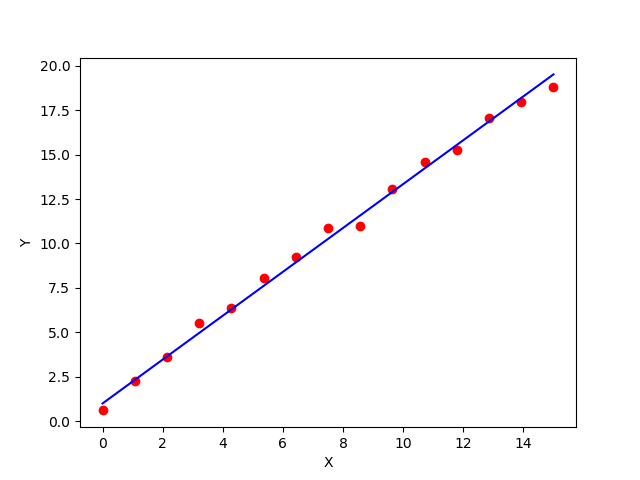

In [2]:
# Primero creamos datos sintéticos con un cierto nivel de ruido
# parámetros de la recta "verdadera"  y = a*x + b

a_true = 1.234
b_true = 1

# creamos valores de x y estimamos los valores de y
xMin = 0
xMax = 15
Nx = 15

x = NP.linspace(xMin, xMax, Nx)

# calculamos el valor verdadero de los valores de y (usando el modelo verdadero o real)
y_true = a_true * x + b_true

# simularemos los valores de y observados (y_obs), 
# agregando un ruido observacional que representamos
# como un ruido gaussiano con desviacion estándar sigma_obs
sigma_obs = 0.5
ruido = NP.random.randn(len(y_true)) * sigma_obs

y_obs = y_true + ruido


# graficamos los datos observados con la recta real
fig = PL.figure(1)
s1 = PL.subplot(1,1,1)
s1.plot(x, y_obs, 'or')
s1.plot(x, y_true, '-b')
s1.set_xlabel('X')
s1.set_ylabel('Y')
PL.show()

In [3]:
# buscar la solucion por minimos cuadrados par ajustar y = ax+b
d = y_obs
# si m = [a, b].T la matriz de diseño queda
G = NP.zeros((Nx,2))
G[:,0] = x
G[:,1] = 1
# la solucion por minimos cuadrados es
invGtG = NP.linalg.inv( G.T.dot(G) )
Gtd = G.T.dot(d)
m_est = invGtG.dot( Gtd )
[a_est, b_est] = m_est
y_pred = G.dot( m_est )
print(m_est)

[1.21324323 1.19106586]


In [4]:
# podríamos haber definido una funcion
def minCuadSimple(G,d):
    invGtG = NP.linalg.inv( G.T.dot(G) )
    Gtd = G.T.dot(d)
    m_est = invGtG.dot( Gtd )
    return m_est


In [5]:
# y usar
[a_est, b_est] = minCuadSimple(G,d)

print('a_est = {:.3f} ; a_true = {:.3f}'.format(a_est, a_true))
print('b_est = {:.3f} ; b_true = {:.3f}'.format(b_est, b_true))


a_est = 1.213 ; a_true = 1.234
b_est = 1.191 ; b_true = 1.000


<IPython.core.display.Javascript object>


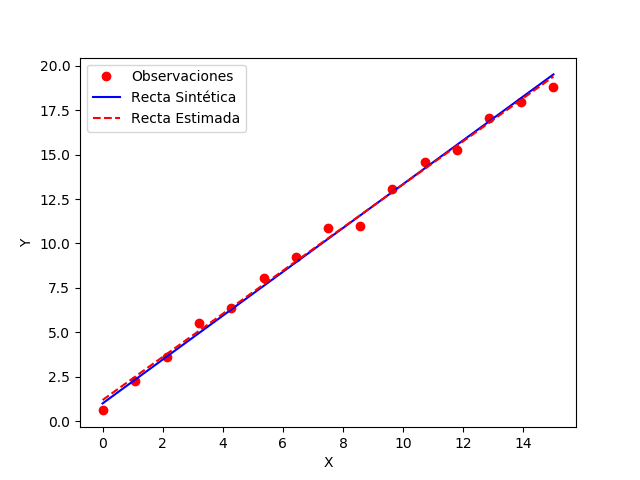

In [6]:
# graficamos los datos observados con la recta real
fig = PL.figure(2)
s1 = PL.subplot(1,1,1)
s1.plot(x, y_obs, 'or', label ='Observaciones') # datos sintéticos con ruido simulando observaciones
s1.plot(x, y_true, '-b', label = 'Recta Sintética') # recta sintética ("verdadera")
s1.plot(x, y_pred, '--r', label = 'Recta Estimada') # predicción de la recta estimada por mínimos cuadrados.
s1.set_xlabel('X')
s1.set_ylabel('Y')
PL.legend(loc='best')
PL.show()

In [7]:
""" ****** ASPECTOS ESTADISTICOS DE MINIMOS CUADRADOS ****** """

' ****** ASPECTOS ESTADISTICOS DE MINIMOS CUADRADOS ****** '

<IPython.core.display.Javascript object>


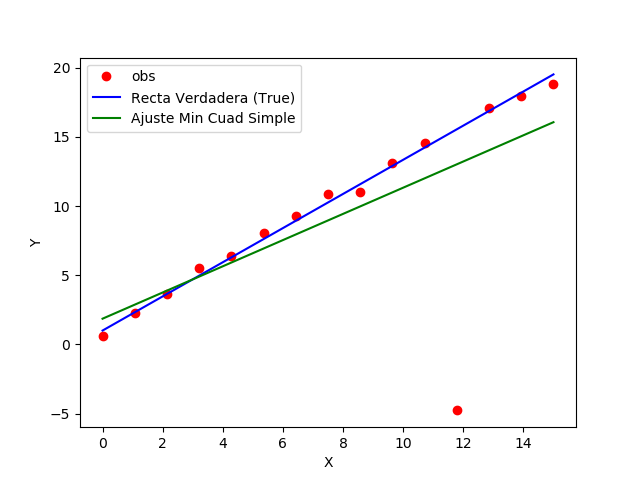

In [8]:
# Aspectos estadísticos de Mínimos Cuadrados 
# Que pasa si uno de los datos es anómalo (outlier)?
# agregar un dato anomalo (outlier)
Ioutlier = [int(NP.ceil(len(y_obs) * 0.7))] # introducimos el dato anomalo
d_con_anomalia = y_obs.copy() # comando copy es necesario para duplicar el array

d_con_anomalia[Ioutlier] =  d_con_anomalia[Ioutlier] - 20
#d_con_anomalia[4] =  d_con_anomalia[4] - 20


# solucion por minimos cuadrados
m_est_anomalia = minCuadSimple(G,d_con_anomalia)
y_pred_d_anomalo = G.dot(m_est_anomalia)

fig = PL.figure(3)
s1 = PL.subplot(1,1,1)
s1.plot(x, d_con_anomalia, 'or')
s1.plot(x, y_true, '-b')
s1.plot(x, y_pred_d_anomalo, 'g')
s1.set_xlabel('X')
s1.set_ylabel('Y')
PL.legend(['obs', 'Recta Verdadera (True)', 'Ajuste Min Cuad Simple'], loc = 'upper left')
PL.show()



